In [68]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import TridiagonalMatrixHandler as tmh
from numba import njit
import importlib
importlib.reload(tmh)

<module 'TridiagonalMatrixHandler' from '/Users/o.peretyatko/Study/university/Diplom/TridiagonalMatrixHandler.py'>

In [59]:
%matplotlib notebook

# $$\frac{\partial u}{\partial t}=D\frac{\partial^2 u}{\partial x^2} + au(1-\frac{u}{C(I)}) - σu;$$
# $$u(x,0)=e^{-i^2}; \qquad x∈(0,L); i∈(0,L)$$
# $$\frac{\partial u}{\partial x}|_{x=0,L} = 0;$$

$$F(u)=au^k_j\cdot(1-\frac{u^{k}_j}{C(I)})- \sigma u^{k}_j$$
$$где\qquad C(I)=C(I(u))=K_0 + K_1I(u); \qquad I=I(u) = \int_0^L u(x,t)dx.$$

In [60]:
K0 = 7
K1 = 0.1

@njit
def carryingCapacityFunction(ukj, i, u_0): 
    integ_tmp = tmh.numbaQuad(u_0)
    K = K0 + K1*integ_tmp
    return ukj/K

u = tmh.createAndSolveUByYavnayMethods(carryingCapacityFunction)
u.max()

577.6611944158803

	Коэффициент миграции (D) = 0.01	Рождения новых людей (a) = 1.5
			Смертность населения (σ) = 0.75

	Количество точек по ОХ (N) = 1000	Количество точек по T (KT) = 10000
	Конец отрезка по OX (L) = 100	Конечный момент (T) = 1000

		число Куранта = 0.09980009999999999	Система устойчивая


<IPython.core.display.Javascript object>


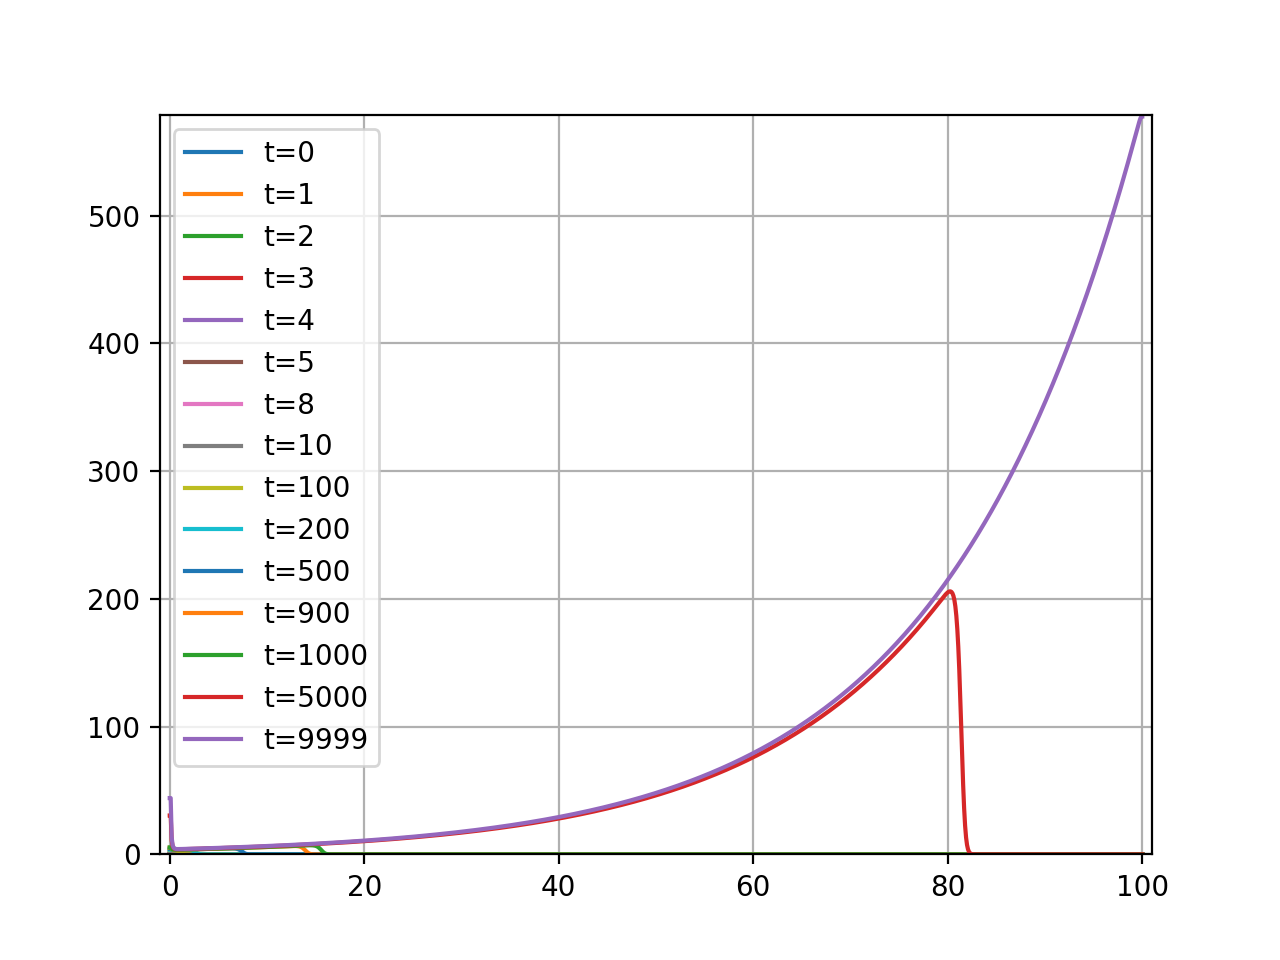

In [61]:
x=tmh.x

tmh.showAllConstant()

# fig = plt.figure(facecolor='white')
# ax = plt.axes(xlim=(0, tmh.L), ylim=(0, u.max()) )
# line, = ax.plot([ ], [ ], lw=3)
# def redraw(i):
#     line.set_data(x, u[:,i])
#     string = 'Время:'+str(i)
#     plt.suptitle(string)
# anim = animation.FuncAnimation(fig,redraw,frames=tmh.KT,interval=1)
# plt.grid(True)
# plt.show()

plt.axes(xlim=(-1, tmh.L+1), ylim=(0, u.max() + 1) )
plt.plot(x, u[:,0], label='t=0')
plt.plot(x, u[:,1], label='t=1')
plt.plot(x, u[:,2], label='t=2')
plt.plot(x, u[:,3], label='t=3')
plt.plot(x, u[:,4], label='t=4')
plt.plot(x, u[:,5], label='t=5')
plt.plot(x, u[:,8], label='t=8')
plt.plot(x, u[:,10], label='t=10')
plt.plot(x, u[:,100], label='t=100')
plt.plot(x, u[:,200], label='t=200')
plt.plot(x, u[:,500], label='t=500')
plt.plot(x, u[:,900], label='t=900')
plt.plot(x, u[:,1000], label='t=1000')
plt.plot(x, u[:,5000], label='t=5000')
plt.plot(x, u[:,9999], label='t=9999')
plt.legend(loc='best')
plt.grid(True)
plt.show()
